In [2]:
import numpy as np
import magpylib as magpy
from scipy.spatial.transform import Rotation as R

e = 65

x = 910/2
y = 710/2
z = 770



def bobines(Ix, Iy, Iz, alpha, disp = False):
    
    coil1 = magpy.Collection()

    for i in np.linspace(0, e, 49):

        # z down
        winding = magpy.current.Line(current = Iz, vertices = [[x, y, -z+i], [-x, y, -z+i], [-x, -y, -z+i], [x, -y, -z+i], [x, y, -z+i]], style_color = 'red' )
        coil1.add(winding) 

        # z middle
        winding = magpy.current.Line(current = Iz*alpha, vertices = [[x, y, i], [-x, y, i], [-x, -y, i], [x, -y, i], [x, y, i]], style_color = 'orange')
        coil1.add(winding)

        # z up
        winding = magpy.current.Line(current = Iz, vertices = [[x, y, z+i], [-x, y, z+i], [-x, -y, z+i], [x, -y, z+i], [x, y, z+i]], style_color = 'red')
        coil1.add(winding)

        # x right
        winding = magpy.current.Line(current = -Ix, vertices = [[x-i, y, -z], [x-i, y, z], [x-i, -y, z], [x-i, -y, -z], [x-i, y, -z]], style_color = 'green')
        coil1.add(winding)

        # x left
        winding = magpy.current.Line(current = -Ix, vertices = [[-x+i, y, -z], [-x+i, y, z], [-x+i, -y, z], [-x+i, -y, -z], [-x+i, y, -z]], style_color = 'green')
        coil1.add(winding)

        # y back
        winding = magpy.current.Line(current = -Iy, vertices = [[x, y-i, -z], [x, y-i, z], [-x, y-i, z], [-x, y-i, -z], [x, y-i, -z]])
        coil1.add(winding)

        # y front
        winding = magpy.current.Line(current = -Iy, vertices = [[x, -y+i, -z], [x, -y+i, z], [-x, -y+i, z], [-x, -y+i, -z], [x, -y+i, -z]])
        coil1.add(winding)
        
    if disp == True:
        coil1.show()
    
    return coil1

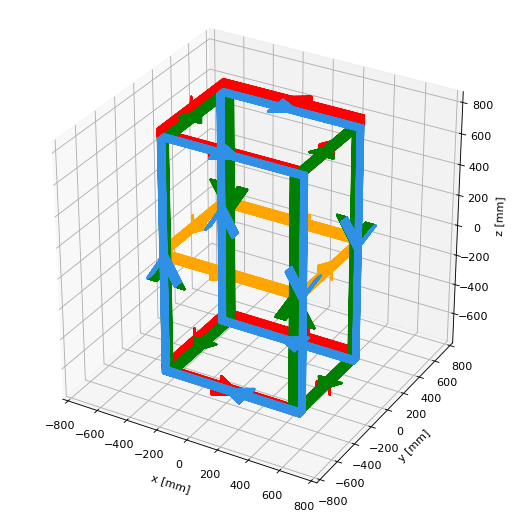

In [3]:
alpha = 280/756
I = np.array([0.0514, 0.078, 0.756])*1000

coil = bobines(I[0], I[1], I[2], alpha, disp = True)

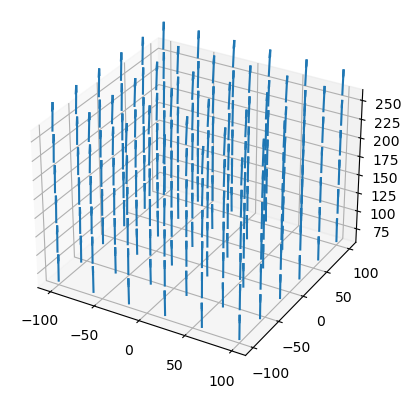

In [4]:
import matplotlib.pyplot as plt


def magfield(coil, disp = True):
    
    if disp:

        # create gridxz and gridxy
        ts = np.arange(-100, 140 , 40)
        gridxy = np.array([[(x, y, 160) for x in ts] for y in ts])
        gridxyz = np.array([[[(0,y,z) for y in ts] for z in ts+160] for x in ts])
        B = magpy.getB(coil, gridxyz)

        # compute and plot field of coil

        #Bamp /= np.amax(Bamp)
        
        ax = plt.figure().add_subplot(projection='3d')

        x, y, z = np.meshgrid(ts, ts, ts +160)
        
        u, v, w = B[:,:,:,0], B[:,:,:,1], B[:,:,:,2]
        
        ax.quiver(x, y, z, u, v, w, length=1, cmap = 'magma_r')

        plt.show()
        
        return B

    else:
        

        # compute and plot field of coil
        B = magpy.getB(coil, (0,0,160))
        
        return B
        

B = magfield(coil)

<IPython.core.display.Javascript object>


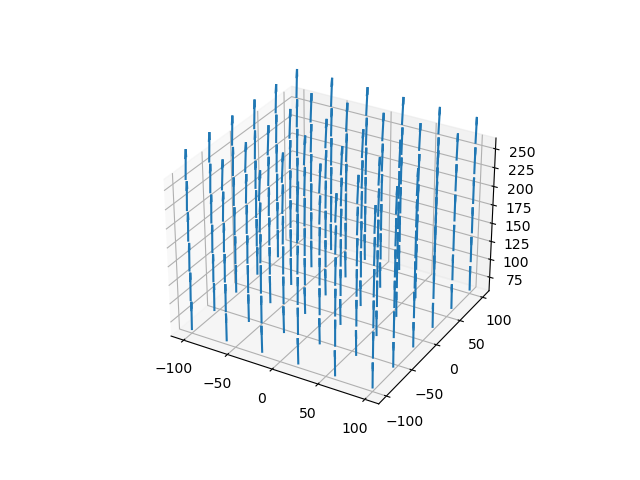

In [5]:
%matplotlib notebook

I = np.array([0.0514, 0.078, 0.756])*1000

B = magfield(bobines(I[0], I[1], I[2], 0.4, disp = False), disp = True)


<IPython.core.display.Javascript object>


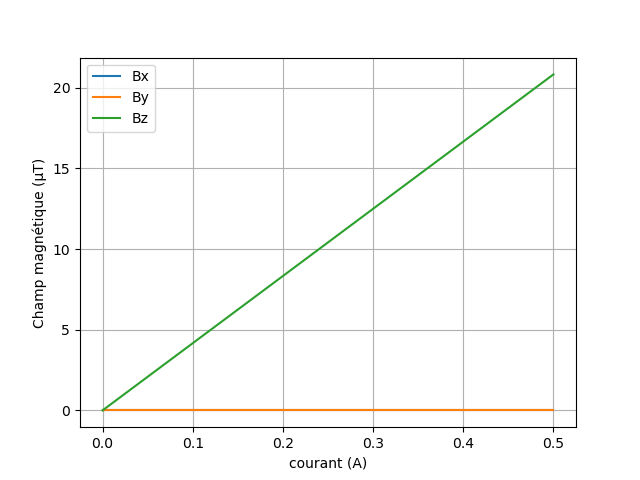

In [6]:
from scipy.stats import linregress

J = np.linspace(0, 0.5, 10)

alpha = 280/756
I = np.array([0.0514, 0.078, 0.28])


champx = []
champy = []
champz = []

for j in J:
    Bi = magfield(bobines(0, 0, j, alpha, disp = False), disp = False)
    champx.append(Bi[0])
    champy.append(Bi[1])
    champz.append(Bi[2])
    
plt.figure()

plt.plot(J, np.array(champx)*1000, label = 'Bx')
plt.plot(J, np.array(champy)*1000, label = 'By')
plt.plot(J, np.array(champz)*1000, label = 'Bz')
plt.xlabel('courant (A)')
plt.ylabel('Champ magnétique (µT)')
plt.legend()
plt.grid()
plt.show()

pz = linregress(J, np.array(champz)*1000).slope

<IPython.core.display.Javascript object>


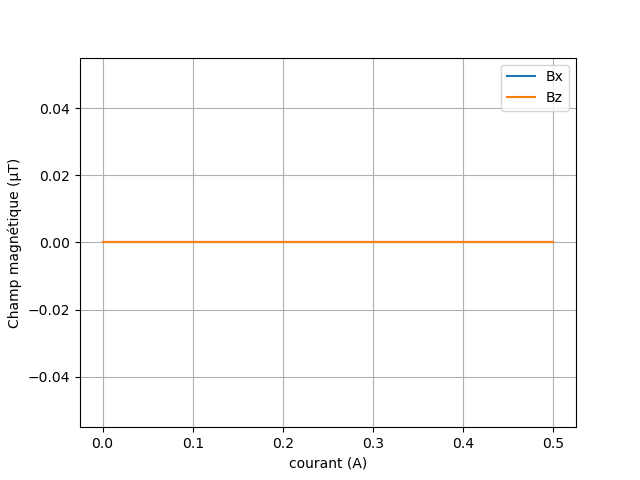

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [7]:
champx = []
champy = []
champz = []

for j in J:
    Bi = magfield(bobines(0, j, 0, alpha, disp = False), disp = False)
    champx.append(Bi[0])
    champy.append(Bi[1])
    champz.append(Bi[2])
    
plt.figure()

plt.plot(J, np.array(champx)*1000, label = 'Bx')
plt.plot(J, np.array(champy)*1000, label = 'By')
plt.plot(J, np.array(champz)*1000, label = 'Bz')
plt.xlabel('courant (A)')
plt.ylabel('Champ magnétique (µT)')
plt.legend()
plt.grid()
plt.show()

py = linregress(J, np.array(champy)*1000).slope

print(champx)

<IPython.core.display.Javascript object>


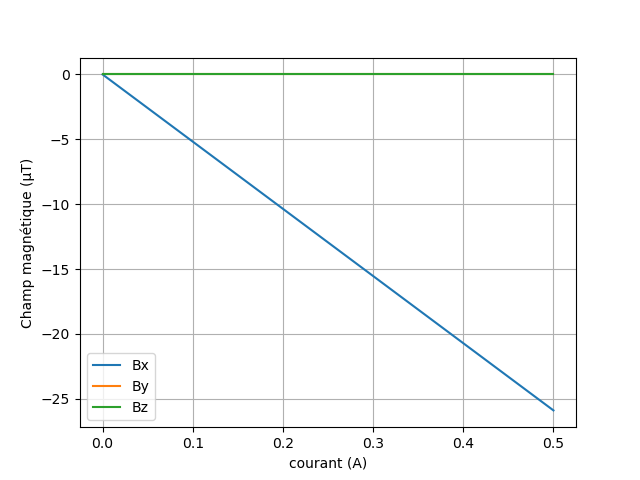

In [8]:
champx = []
champy = []
champz = []

for j in J:
    Bi = magfield(bobines(j, 0, 0, alpha, disp = False), disp = False)
    champx.append(Bi[0])
    champy.append(Bi[1])
    champz.append(Bi[2])
    
plt.figure()

plt.plot(J, np.array(champx)*1000, label = 'Bx')
plt.plot(J, np.array(champy)*1000, label = 'By')
plt.plot(J, np.array(champz)*1000, label = 'Bz')
plt.xlabel('courant (A)')
plt.ylabel('Champ magnétique (µT)')
plt.legend()
plt.grid()
plt.show()

px = linregress(J, np.array(champx)*1000).slope


In [9]:
print(px, py, pz)

-51.77777585142497 67.49159802351839 41.66274632488274


In [10]:
D = []

A = np.linspace(0, 0.5, 10)

for alpha in A:
    coil = bobines(I[0], I[1], I[2], alpha, disp = False)
    delta = magfield(coil, disp = False, Delta = True)
    D.append(delta)

    
plt.figure()
plt.xlabel('alpha')
plt.ylabel('ΔB (µT)')
plt.title('Variation maximale du champ dans un cube de 20cm en fonction du ratio du courant')
plt.plot(A, D)
plt.grid()
plt.show()


TypeError: magfield() got an unexpected keyword argument 'Delta'

In [ ]:
plt.figure()
plt.xlabel('alpha')
plt.ylabel('ΔB (µT)')
plt.title('Variation maximale du champ dans un cube de 20cm en fonction du ratio du courant')
plt.plot(A, D)
plt.grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

Bamp = np.linalg.norm(Bxy, axis =2)

ts = np.linspace(-100, 100 , 100)

fig = go.Figure(go.Surface(
    
    contours = {
        
        "z": {"show": True, "start": np.amin(Bamp), "end": np.amax(Bamp), "size": (np.amax(Bamp) - np.amin(Bamp))/20}
    },
    
    x = ts,
    y = ts,
    z = Bamp))

fig.update_scenes(xaxis_title_text='x (mm)',  
                  yaxis_title_text='y (mm)',  
                  zaxis_title_text='Norme de B (mT)')

fig.update_traces(contours_z=dict(show=True, usecolormap=True, project_z=True))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()

In [ ]:
p = np.empty((3, 3))
print(np.max(p))